In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

store_data = pd.read_csv(r"../data/점포.csv")
sale_data = pd.read_csv(r"../data/매출.csv")

In [45]:
# row 생략 없이 출력
pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)

In [23]:
store_data = store_data.drop('Unnamed: 0', axis=1)
sale_data = sale_data.drop('Unnamed: 0', axis=1)

KeyError: "['Unnamed: 0'] not found in axis"

In [27]:
store_data.columns = ['기준_년분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명', '서비스_업종_코드',
       '서비스_업종_코드_명', '점포_수', '유사_업종_점포_수', '개업_율', '개업_점포_수', '폐업_률',
       '폐업_점포_수', '프랜차이즈_점포_수']
sale_data.columns = ['기준_년분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명', '서비스_업종_코드',
       '서비스_업종_코드_명', '당월_매출_금액', '당월_매출_건수', '주중_매출_금액', '주말_매출_금액',
       '월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액',
       '토요일_매출_금액', '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액',
       '시간대_11~14_매출_금액', '시간대_14~17_매출_금액', '시간대_17~21_매출_금액',
       '시간대_21~24_매출_금액', '남성_매출_금액', '여성_매출_금액', '연령대_10_매출_금액',
       '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액', '연령대_50_매출_금액',
       '연령대_60_이상_매출_금액', '주중_매출_건수', '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수',
       '수요일_매출_건수', '목요일_매출_건수', '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수',
       '시간대_건수~06_매출_건수', '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수',
       '시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수', '남성_매출_건수',
       '여성_매출_건수', '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수',
       '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수']

In [28]:
store_data.columns
sale_data.columns

Index(['기준_년분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명', '서비스_업종_코드',
       '서비스_업종_코드_명', '점포_수', '유사_업종_점포_수', '개업_율', '개업_점포_수', '폐업_률',
       '폐업_점포_수', '프랜차이즈_점포_수'],
      dtype='object')

In [29]:
store_data.info()
sale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228399 entries, 0 to 228398
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   기준_년분기_코드    228399 non-null  int64  
 1   상권_구분_코드     228399 non-null  object 
 2   상권_구분_코드_명   228399 non-null  object 
 3   상권_코드        228399 non-null  int64  
 4   상권_코드_명      228399 non-null  object 
 5   서비스_업종_코드    228399 non-null  object 
 6   서비스_업종_코드_명  228399 non-null  object 
 7   점포_수         228399 non-null  float64
 8   유사_업종_점포_수   228399 non-null  float64
 9   개업_율         228399 non-null  float64
 10  개업_점포_수      228399 non-null  float64
 11  폐업_률         228399 non-null  float64
 12  폐업_점포_수      228399 non-null  float64
 13  프랜차이즈_점포_수   228399 non-null  float64
dtypes: float64(7), int64(2), object(5)
memory usage: 24.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386648 entries, 0 to 386647
Data columns (total 55 columns):
 #   Column           Non-N

In [30]:
print(store_data.shape)
print(sale_data.shape)

(228399, 14)
(386648, 55)


데이터 합치기

In [32]:
sale_store = pd.merge(sale_data, store_data, on=['기준_년분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명', '서비스_업종_코드', '서비스_업종_코드_명'])

head

In [41]:
sale_store.head()

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,...,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,20231,D,발달상권,3120050,서울숲역,CS100010,커피-음료,2.287190e+08,16371.0,1.738412e+08,...,2012.0,876.0,280.0,13.0,15.0,0.0,0.0,0.0,0.0,2.0
1,20231,D,발달상권,3120054,어린이대공원역,CS100007,치킨전문점,4.346601e+08,32664.0,3.109777e+08,...,2017.0,3425.0,865.0,8.0,15.0,13.0,2.0,0.0,0.0,7.0
2,20231,A,골목상권,3110757,양평역 2번,CS200033,부동산중개업,1.175862e+08,10348.0,5.526550e+07,...,705.0,0.0,0.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0
3,20231,R,전통시장,3130024,남대문시장(자유상가),CS300009,청과상,2.388089e+09,83111.0,2.116885e+09,...,8777.0,16469.0,47593.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0
4,20231,A,골목상권,3110496,모래내우체국,CS300002,편의점,9.283034e+08,130919.0,6.607113e+08,...,32883.0,22500.0,15542.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0


열, 데이터 타입 확인

In [49]:
sale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386648 entries, 0 to 386647
Data columns (total 55 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   기준_년분기_코드        386648 non-null  int64  
 1   상권_구분_코드         386648 non-null  object 
 2   상권_구분_코드_명       386648 non-null  object 
 3   상권_코드            386648 non-null  int64  
 4   상권_코드_명          386648 non-null  object 
 5   서비스_업종_코드        386648 non-null  object 
 6   서비스_업종_코드_명      386648 non-null  object 
 7   당월_매출_금액         386648 non-null  float64
 8   당월_매출_건수         386648 non-null  float64
 9   주중_매출_금액         386648 non-null  float64
 10  주말_매출_금액         386648 non-null  float64
 11  월요일_매출_금액        386648 non-null  float64
 12  화요일_매출_금액        386648 non-null  float64
 13  수요일_매출_금액        386648 non-null  float64
 14  목요일_매출_금액        386648 non-null  float64
 15  금요일_매출_금액        386648 non-null  float64
 16  토요일_매출_금액        386648 non-null  floa

결측치 확인

In [50]:
print(sale_store.isna().sum().sum())

0


데이터 describe

In [59]:
sale_store.describe(include='float64')

,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
count,6.285600e+04,6.285600e+04,6.285600e+04,6.285600e+04,6.285600e+04,6.285600e+04,6.285600e+04,6.285600e+04,6.285600e+04,6.285600e+04,6.285600e+04,6.285600e+04,6.285600e+04,6.285600e+04,6.285600e+04,6.285600e+04,6.285600e+04,6.285600e+04,6.285600e+04,6.285600e+04,6.285600e+04,6.285600e+04,6.285600e+04,6.285600e+04,6.285600e+04,6.285600e+04,6.285600e+04,6.285600e+04,6.285600e+04,6.285600e+04,6.285600e+04,6.285600e+04,6.285600e+04,6.285600e+04,62856.000000,6.285600e+04,6.285600e+04,6.285600e+04,6.285600e+04,62856.000000,6.285600e+04,6.285600e+04,62856.000000,6.285600e+04,6.285600e+04,6.285600e+04,6.285600e+04,6.285600e+04,62856.000000,62856.000000,62856.000000,62856.000000,62856.000000,62856.000000,62856.000000
mean,1.106422e+09,3.916429e+04,8.375879e+08,2.688343e+08,1.621548e+08,1.642932e+08,1.646371e+08,1.649703e+08,1.815325e+08,1.660067e+08,1.028276e+08,3.504748e+07,1.191502e+08,2.865647e+08,2.748478e+08,3.022092e+08,8.860275e+07,5.037990e+08,4.811504e+08,5.209446e+06,1.238506e+08,2.016020e+08,2.248627e+08,2.216094e+08,2.078144e+08,2.951545e+04,9.648841e+03,5.895936e+03,5.716116e+03,5.840750e+03,5.869030e+03,6.193621e+03,5.608746e+03,4.040095e+03,1383.580454,5.543263e+03,1.027174e+04,8.248843e+03,1.037550e+04,3341.369273,1.930548e+04,1.817533e+04,535.239468,7.349388e+03,9.098630e+03,7.525251e+03,6.912720e+03,6.059584e+03,13.588472,14.978077,2.713599,0.376177,2.803408,0.424526,1.389605
std,8.937689e+09,1.667218e+05,6.177731e+09,3.278760e+09,1.169872e+09,1.237006e+09,1.203114e+09,1.225082e+09,1.410715e+09,1.881658e+09,1.427246e+09,6.130295e+08,1.202027e+09,2.387336e+09,2.932039e+09,2.546474e+09,4.521060e+08,4.283712e+09,3.506673e+09,2.876439e+07,7.733252e+08,1.574065e+09,1.760246e+09,1.915019e+09,2.093904e+09,1.177808e+05,5.572218e+04,2.310018e+04,2.295759e+04,2.328623e+04,2.360757e+04,2.526565e+04,3.114988e+04,2.495913e+04,10359.774672,2.993581e+04,4.666516e+04,4.385930e+04,4.513658e+04,14374.964416,8.313944e+04,8.145864e+04,3319.423274,3.868031e+04,4.167128e+04,3.210159e+04,2.932385e+04,3.923087e+04,73.734210,74.355352,6.771162,1.070800,7.008832,2.034997,4.023382
min,1.200000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.866780e+07,8.590000e+02,3.596341e+07,7.531147e+06,5.543460e+06,5.609510e+06,6.168489e+06,5.992462e+06,6.598521e+06,4.823218e+06,0.000000e+00,0.000000e+00,1.852455e+05,5.631347e+06,7.823848e+06,1.193813e+07,0.000000e+00,1.955219e+07,1.819407e+07,0.000000e+00,1.168840e+06,4.747698e+06,7.831784e+06,8.550007e+06,4.621456e+06,6.480000e+02,1.530000e+02,1.160000e+02,1.150000e+02,1.230000e+02,1.210000e+02,1.330000e+02,1.040000e+02,0.000000e+00,0.000000,8.000000e+00,1.110000e+02,1.700000e+02,2.240000e+02,0.000000,3.850000e+02,3.390000e+02,0.000000,3.800000e+01,1.110000e+02,1.6

In [58]:
sale_store.describe(include='object')

,상권_구분_코드,상권_구분_코드_명,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명
count,62856,62856,62856,62856,62856
unique,4,4,1569,63,63
top,A,골목상권,명동 남대문 북창동 다동 무교동 관광특구,CS100001,한식음식점
freq,31001,31001,166,4299,4299


밀도 그래프

In [61]:
sale_store.columns

Index(['기준_년분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명', '서비스_업종_코드',
       '서비스_업종_코드_명', '당월_매출_금액', '당월_매출_건수', '주중_매출_금액', '주말_매출_금액',
       '월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액',
       '토요일_매출_금액', '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액',
       '시간대_11~14_매출_금액', '시간대_14~17_매출_금액', '시간대_17~21_매출_금액',
       '시간대_21~24_매출_금액', '남성_매출_금액', '여성_매출_금액', '연령대_10_매출_금액',
       '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액', '연령대_50_매출_금액',
       '연령대_60_이상_매출_금액', '주중_매출_건수', '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수',
       '수요일_매출_건수', '목요일_매출_건수', '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수',
       '시간대_건수~06_매출_건수', '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수',
       '시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수', '남성_매출_건수',
       '여성_매출_건수', '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수',
       '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수', '점포_수', '유사_업종_점포_수',
       '개업_율', '개업_점포_수', '폐업_률', '폐업_점포_수', '프랜차이즈_점포_수'],
      dtype=

In [75]:
요일별매출금액 = ['월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액', '일요일_매출_금액']
주말주중매출금액 = ['주중_매출_금액', '주말_매출_금액']
시간대별매출금액 = ['시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액', '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액']
성별매출금액 = ['남성_매출_금액', '여성_매출_금액']
연령대별매출금액 = [ '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액']
주말주중매출건수 = ['주중_매출_건수', '주말_매출_건수']
요일별매출건수 = ['월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수', '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수']
시간대별매출건수 = ['시간대_건수~06_매출_건수', '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수', '시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수']
성별매출건수 = ['남성_매출_건수', '여성_매출_건수']
연령대별매출건수 = ['연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수', '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수']
점포정보 = ['점포_수', '유사_업종_점포_수', '개업_율', '개업_점포_수', '폐업_률', '폐업_점포_수', '프랜차이즈_점포_수']

열분류 = ['요일별매출금액', '주말주중매출금액', '시간대별매출금액', '성별매출금액', '연령대별매출금액', '주말주중매출건수', '요일별매출건수', '시간대별매출건수', '성별매출건수', '연령대별매출건수', '점포정보']

밀도 그래프

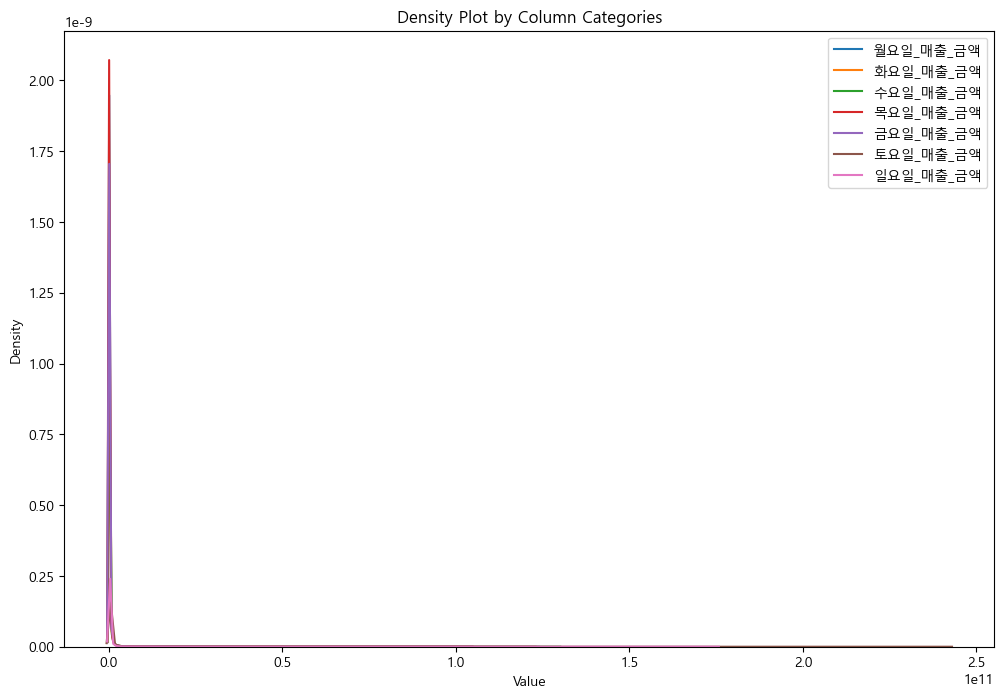

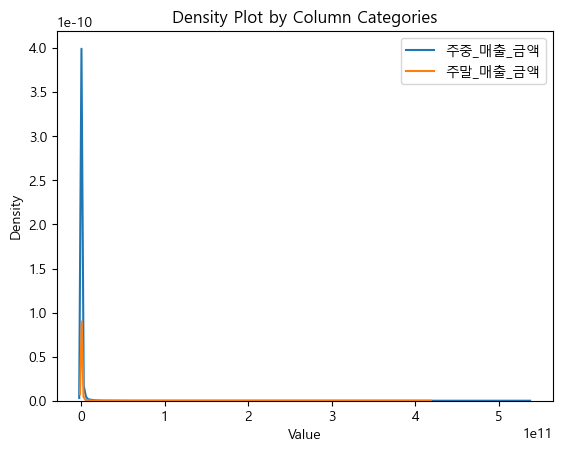

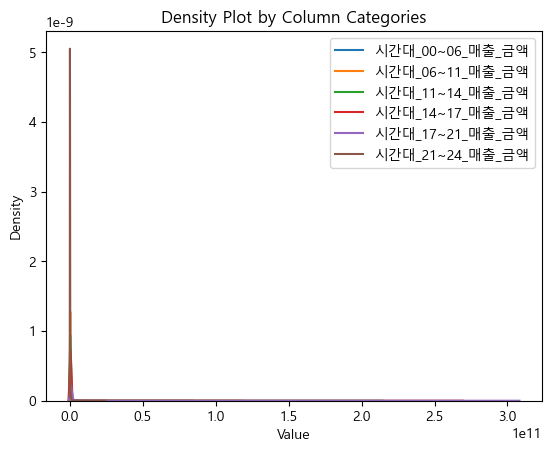

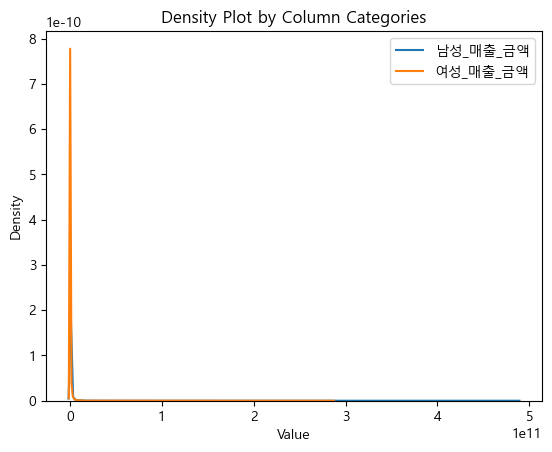

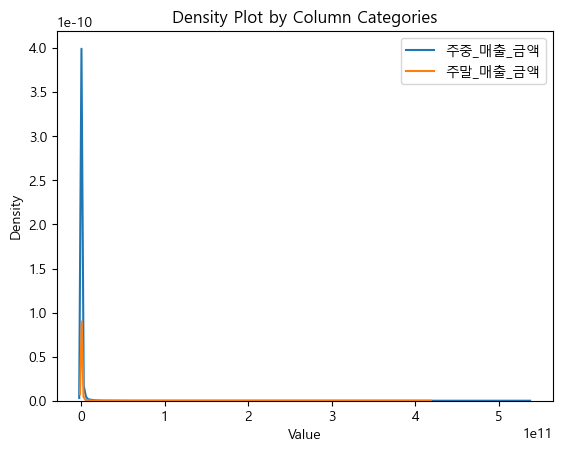

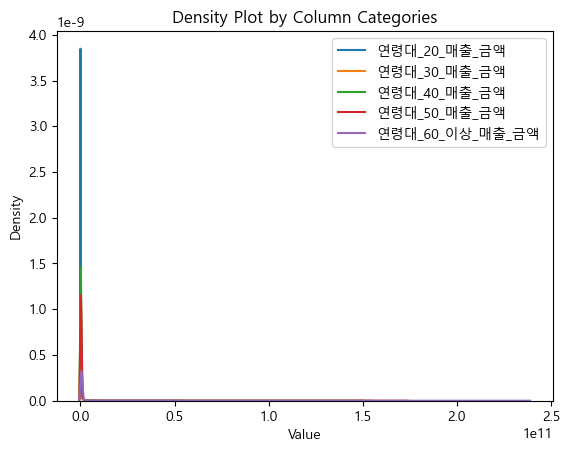

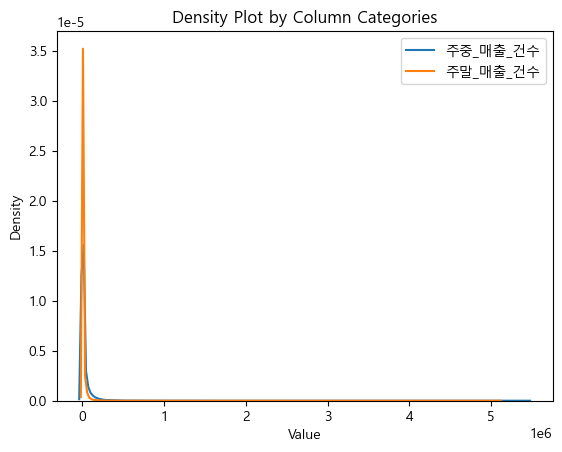

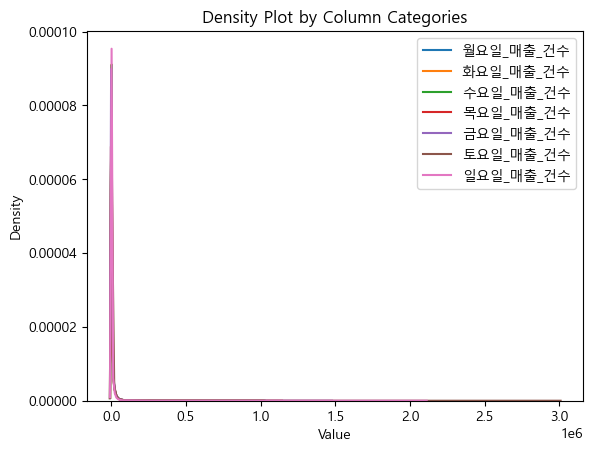

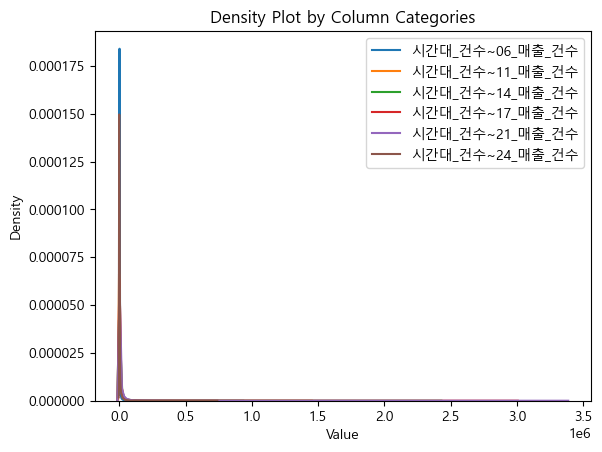

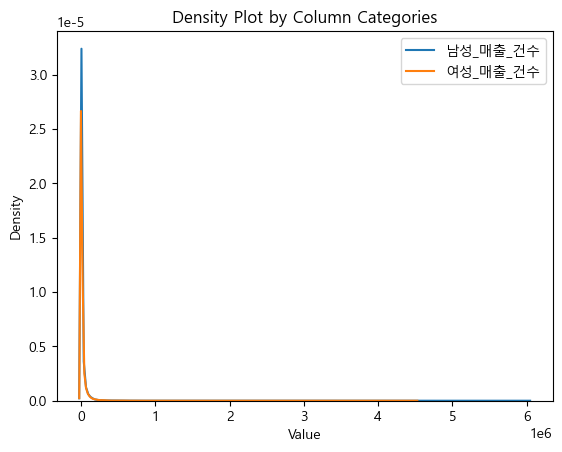

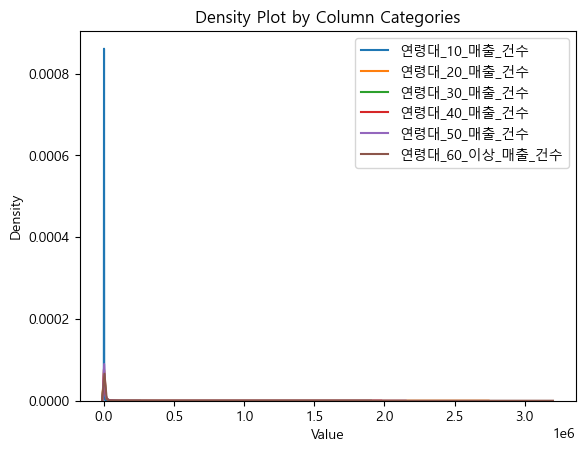

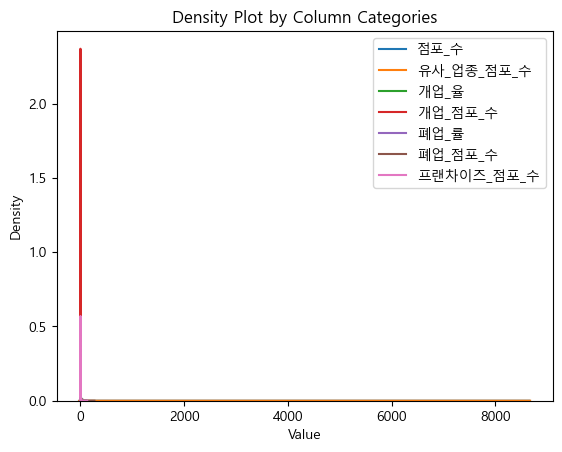

In [78]:
# 점포정보 열 선택
점포정보 = ['점포_수', '유사_업종_점포_수', '개업_율', '개업_점포_수', '폐업_률', '폐업_점포_수', '프랜차이즈_점포_수']

# 선택된 열로 새로운 데이터프레임 생성
df_store_info = sale_store[점포정보]

# 박스 플롯 그리기
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_store_info)
plt.title('점포 정보 Box Plot')
plt.xlabel('점포 정보')
plt.ylabel('값')
plt.show()

box plot

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

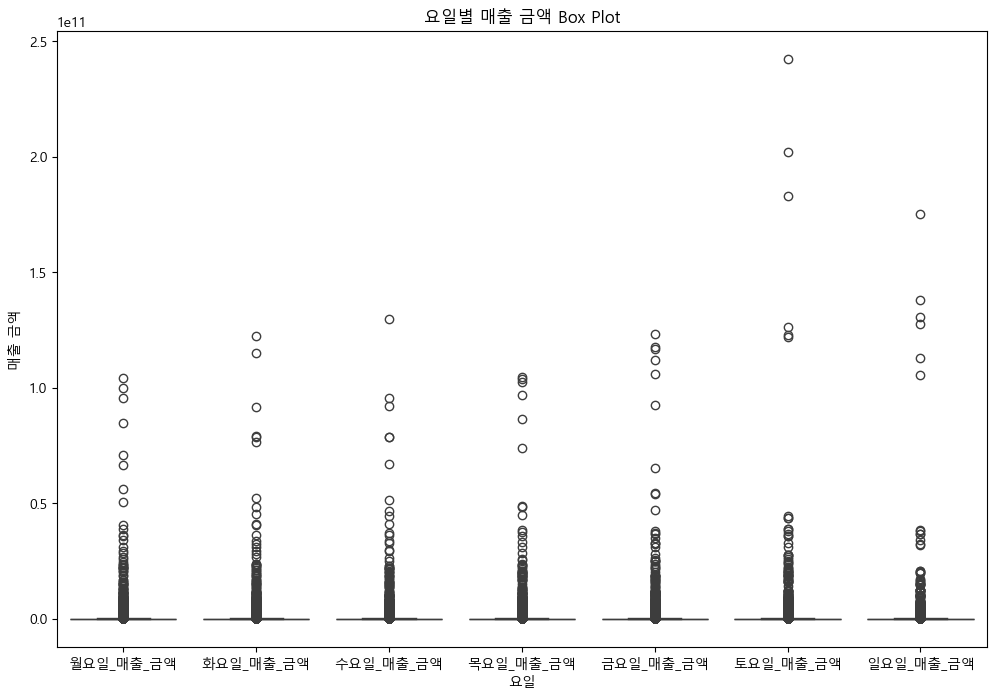

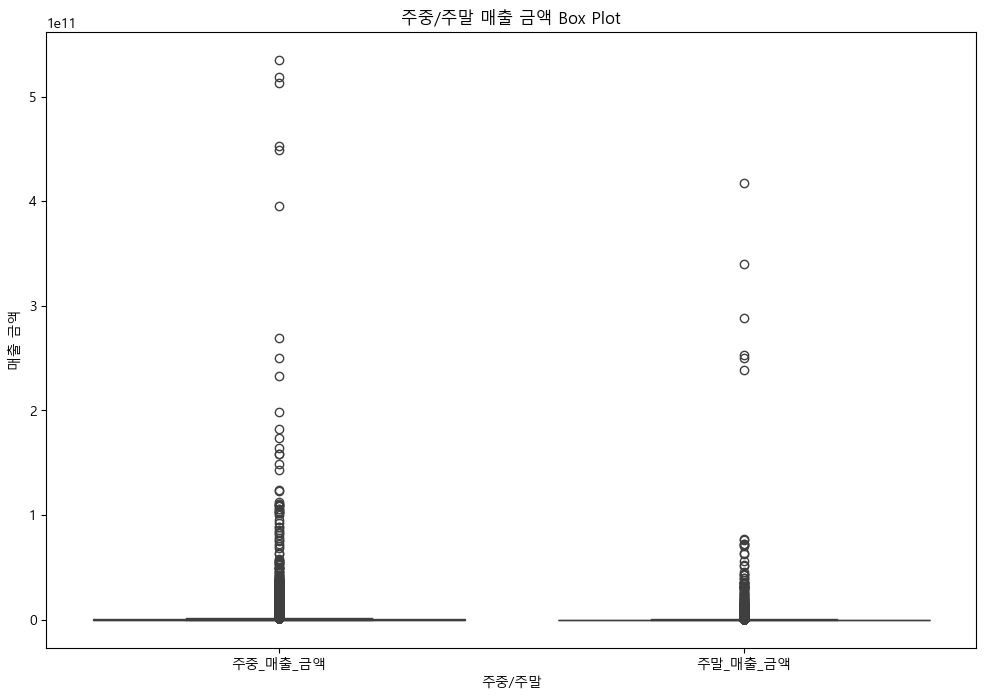

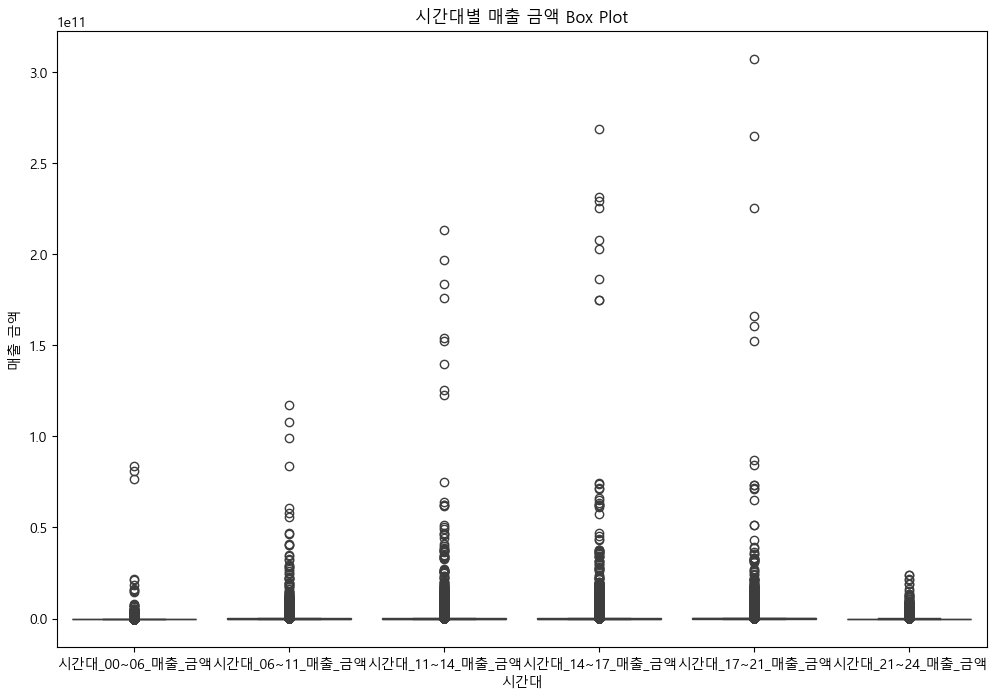

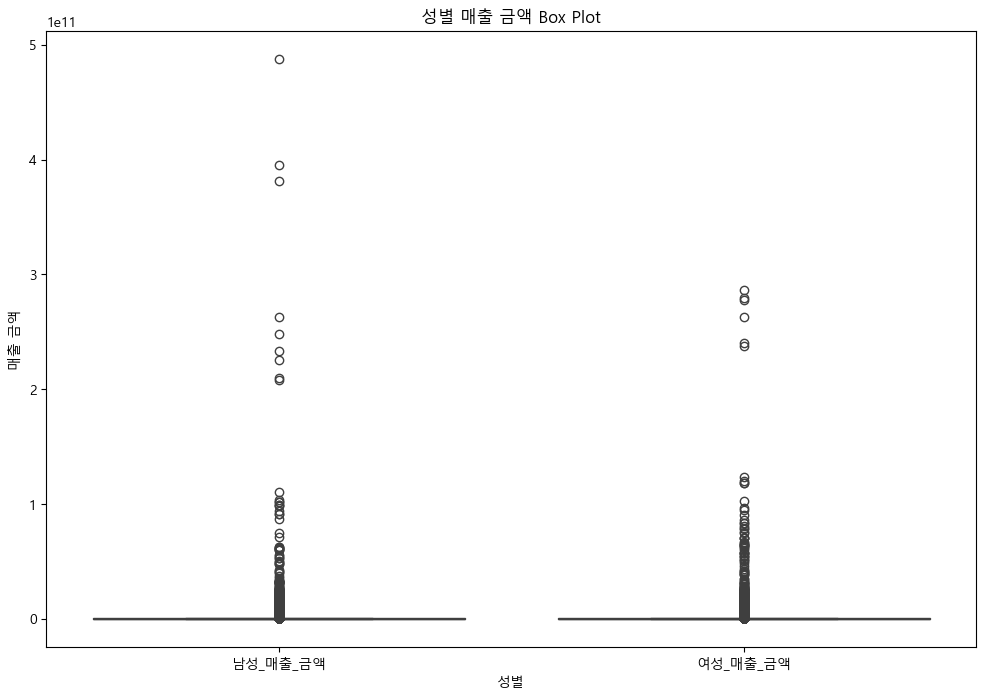

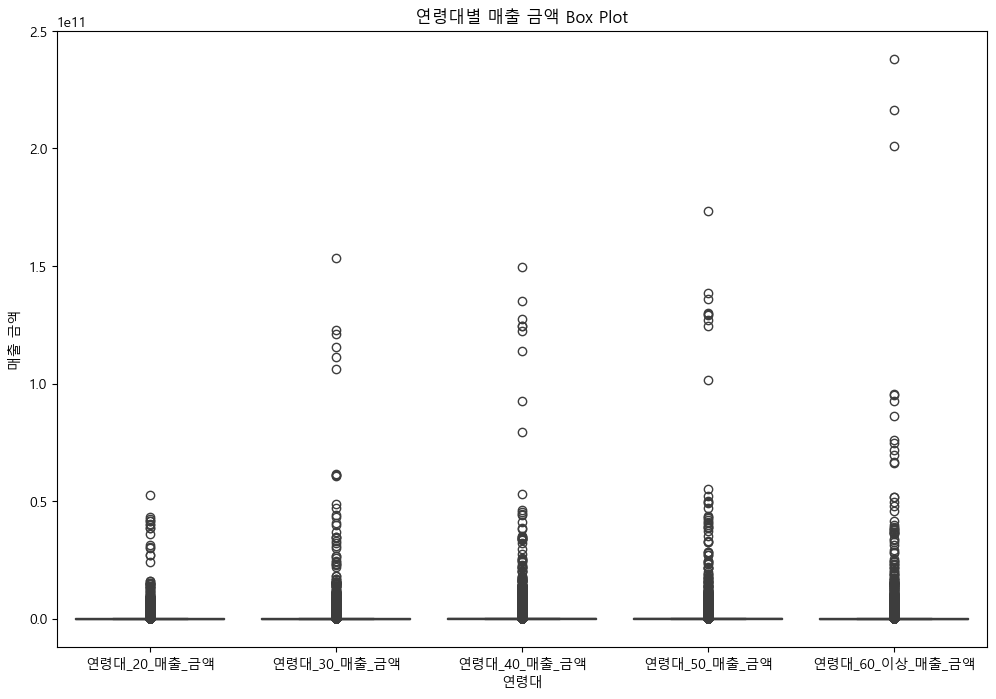

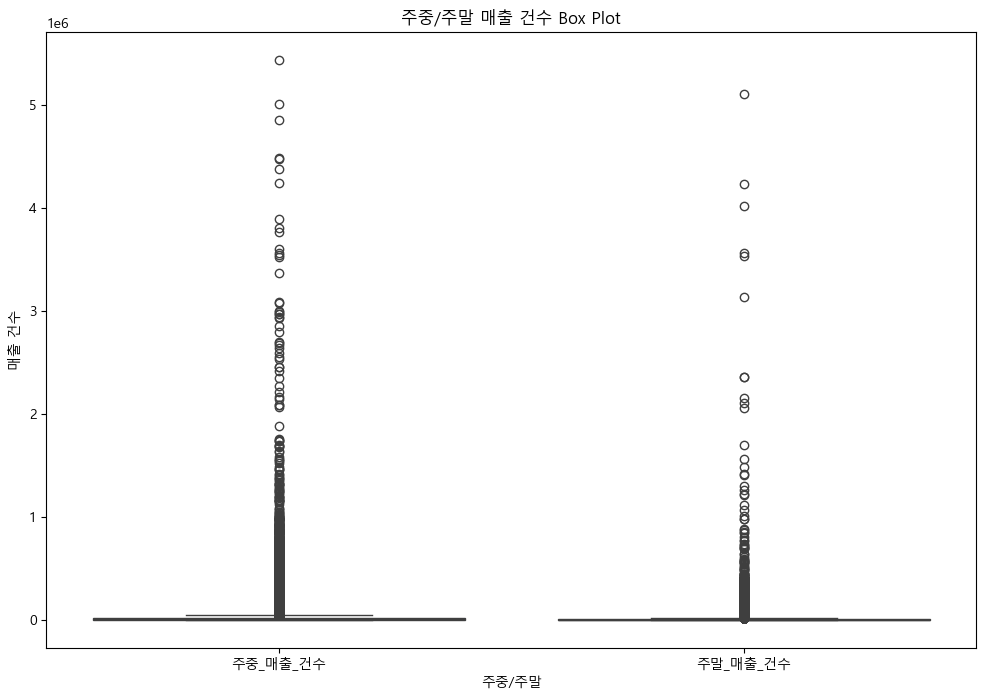

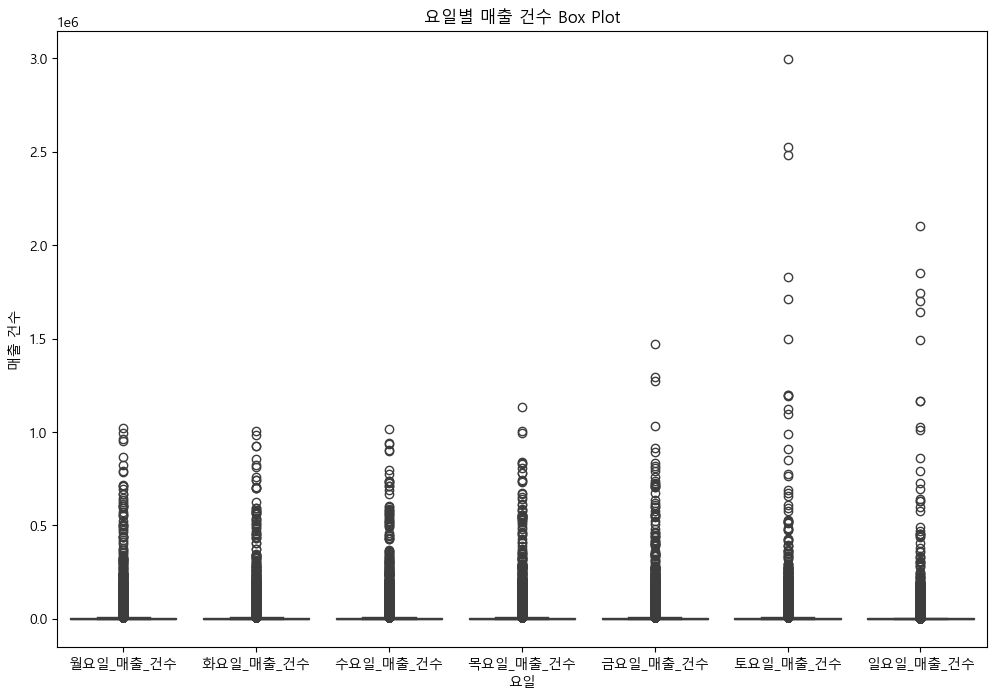

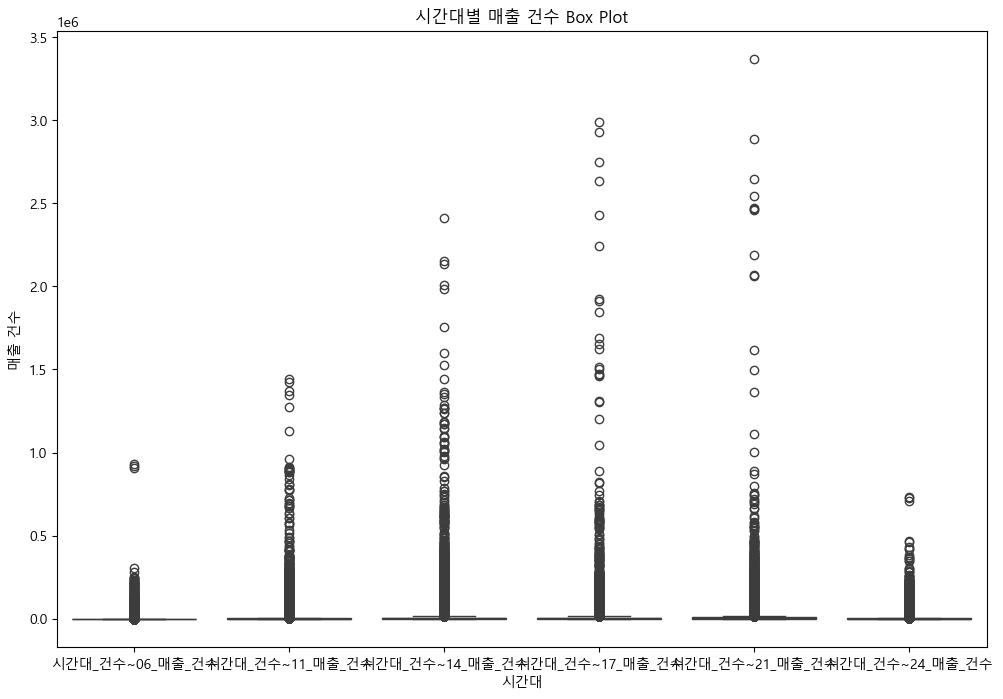

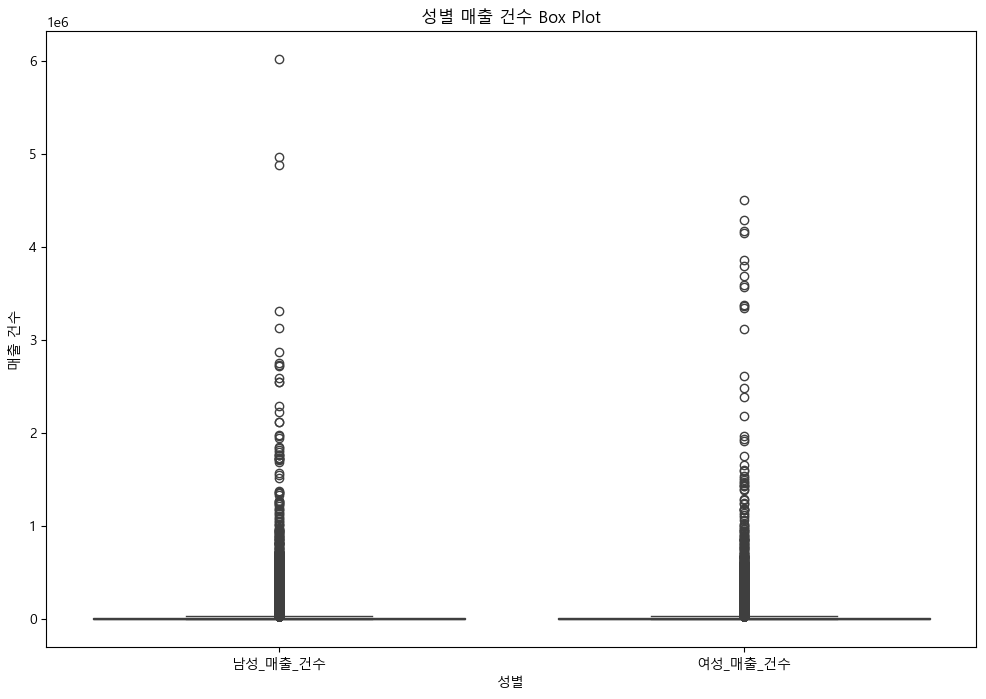

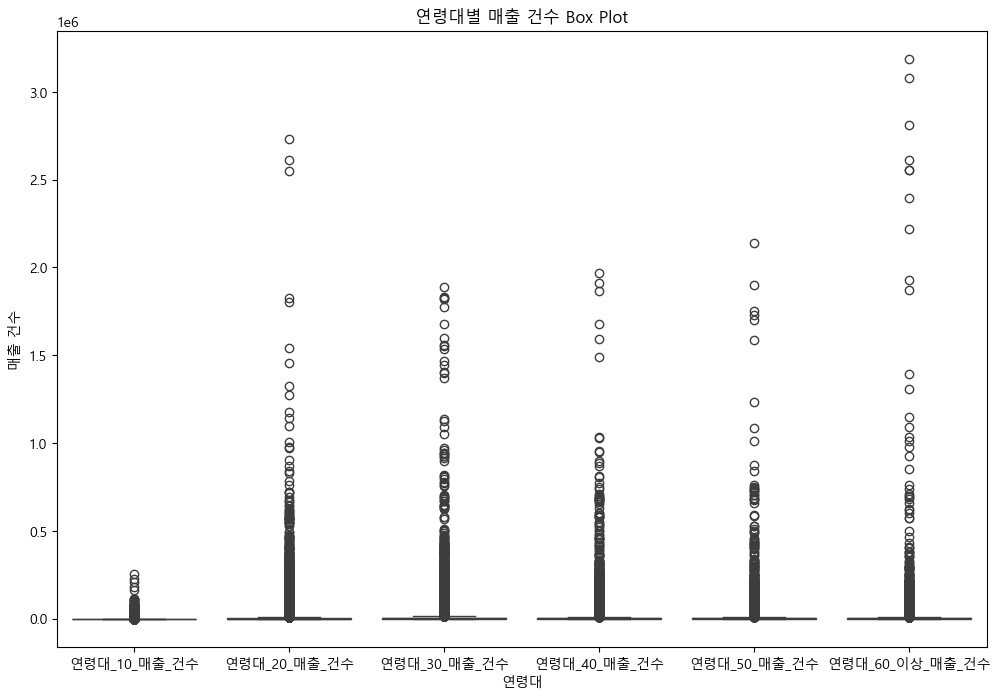

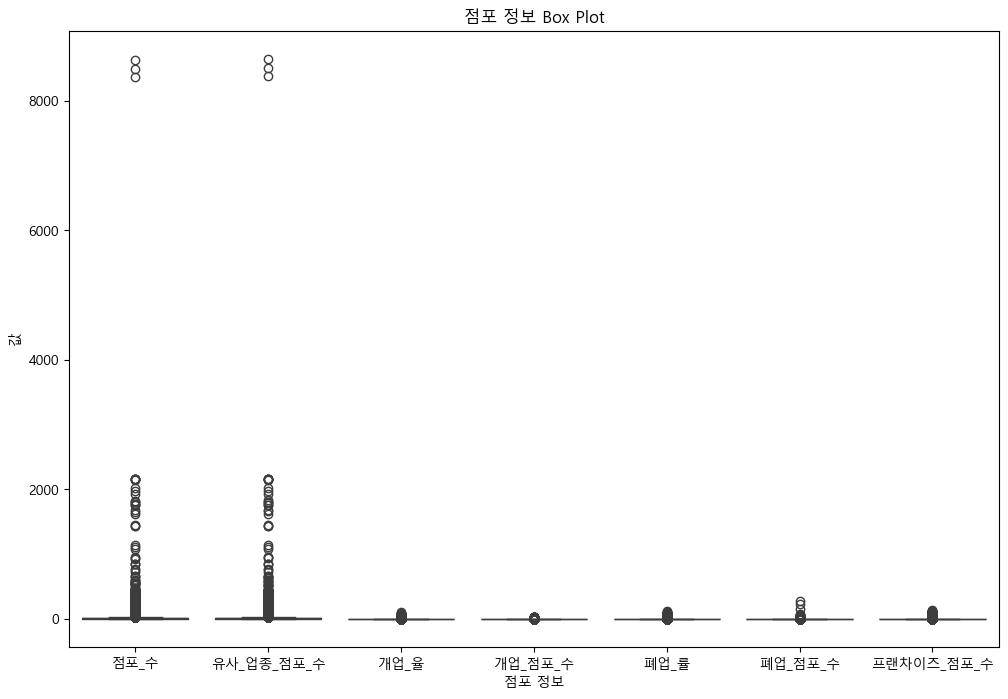

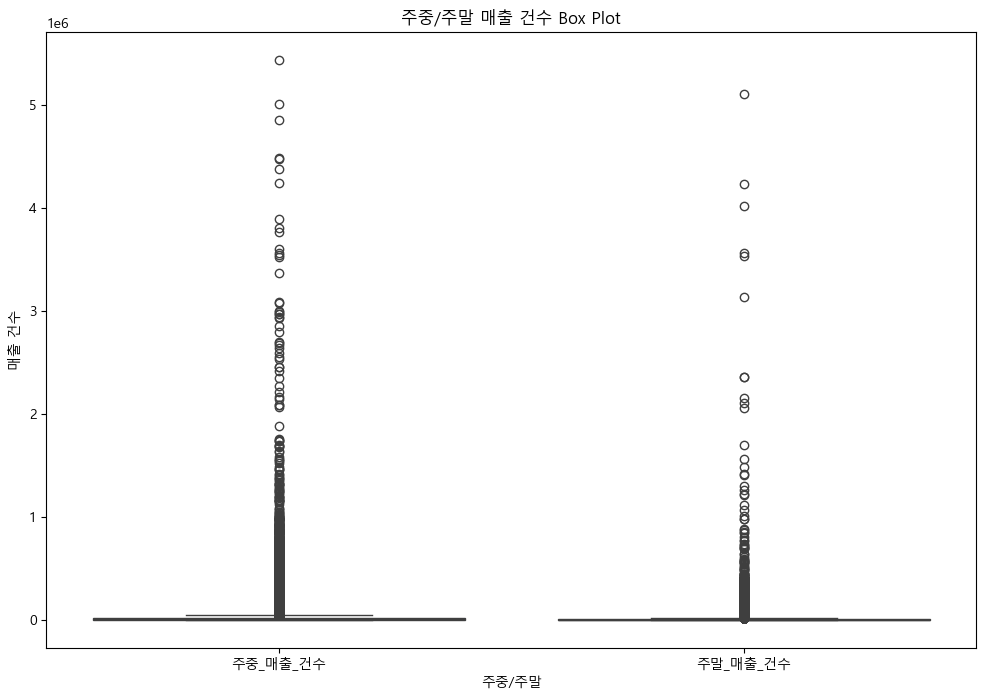

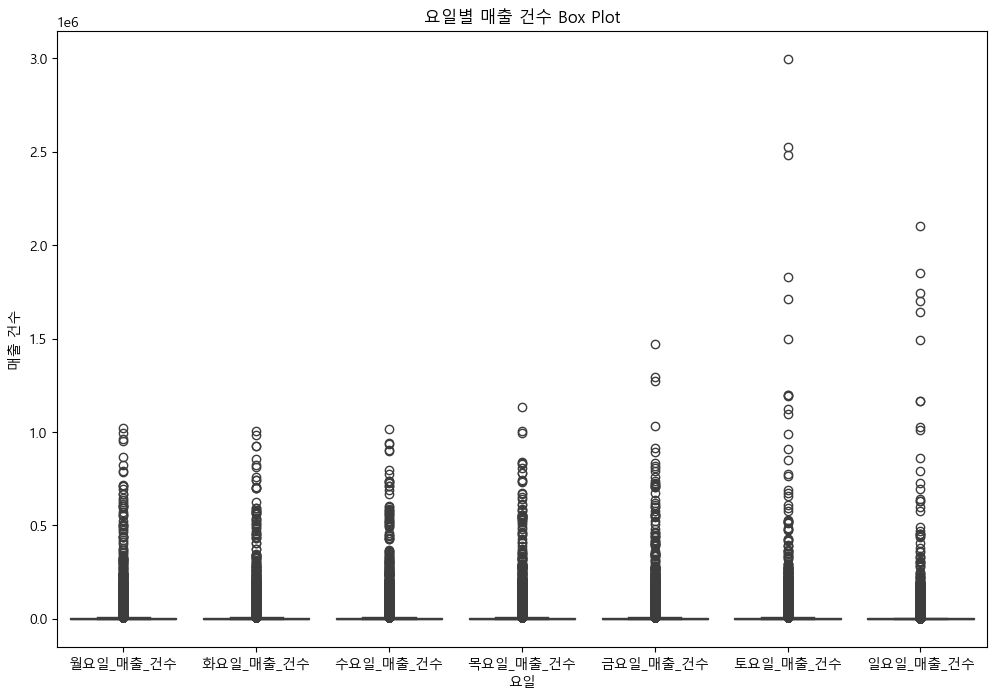

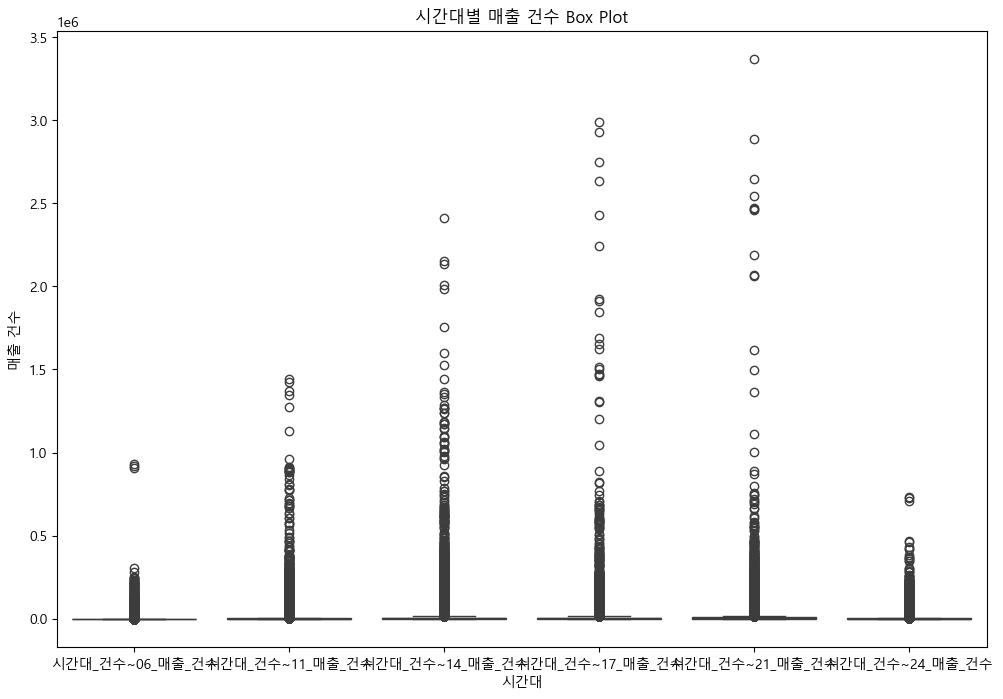

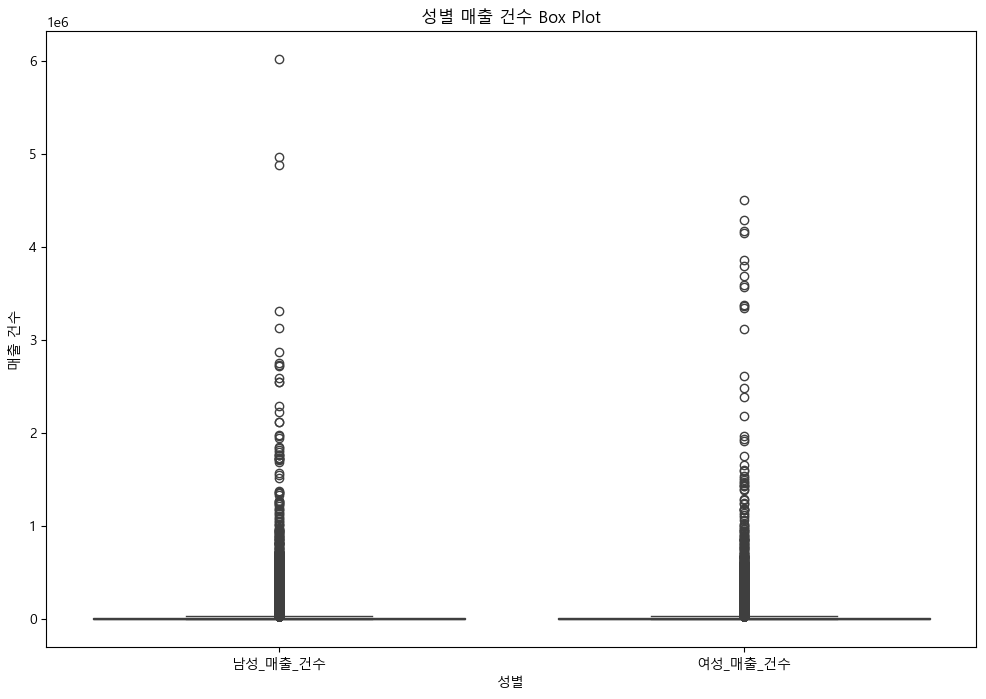

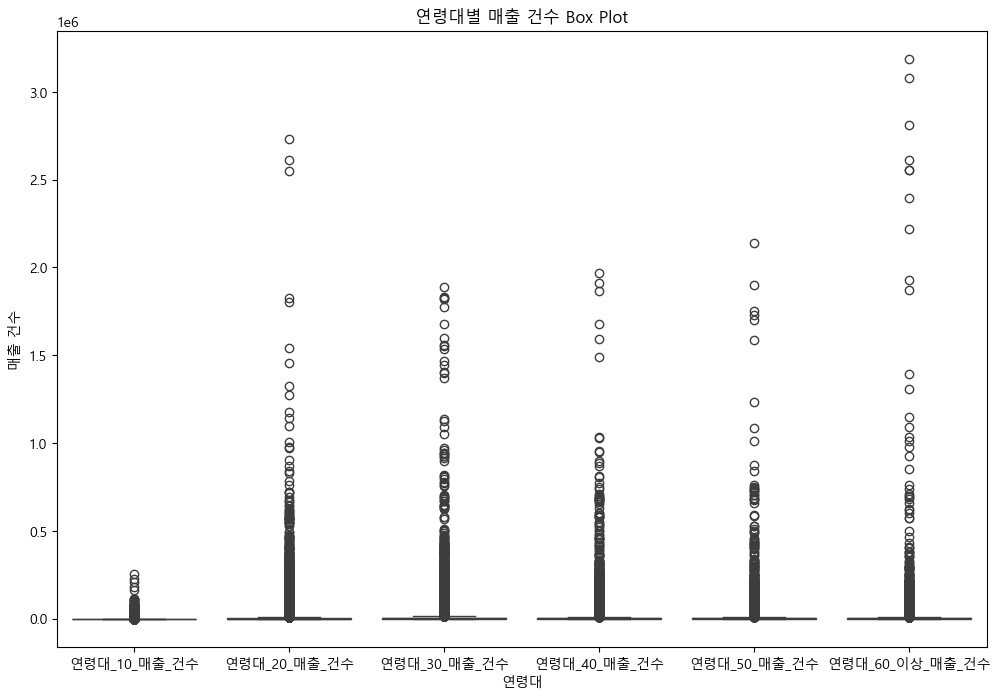

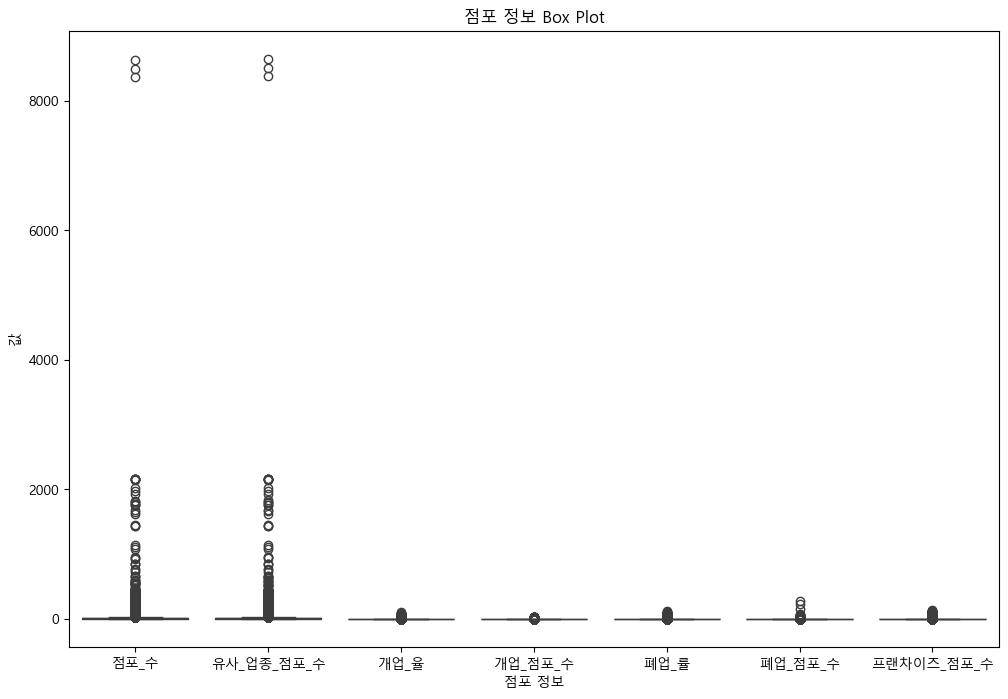

In [92]:
# 요일별 매출 금액 열 선택
요일별매출금액 = ['월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액', '일요일_매출_금액']

# 선택된 열로 새로운 데이터프레임 생성
df_weekday_sales = sale_store[요일별매출금액]

# 박스 플롯 그리기
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_weekday_sales)
plt.title('요일별 매출 금액 Box Plot')
plt.xlabel('요일')
plt.ylabel('매출 금액')
plt.show()


# 주말주중 매출 금액 열 선택
주말주중매출금액 = ['주중_매출_금액', '주말_매출_금액']

# 선택된 열로 새로운 데이터프레임 생성
df_weekday_weekend_sales = sale_store[주말주중매출금액]

# 박스 플롯 그리기
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_weekday_weekend_sales)
plt.title('주중/주말 매출 금액 Box Plot')
plt.xlabel('주중/주말')
plt.ylabel('매출 금액')
plt.show()


# 시간대별 매출 금액 열 선택
시간대별매출금액 = ['시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액', '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액']

# 선택된 열로 새로운 데이터프레임 생성
df_time_sales = sale_store[시간대별매출금액]

# 박스 플롯 그리기
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_time_sales)
plt.title('시간대별 매출 금액 Box Plot')
plt.xlabel('시간대')
plt.ylabel('매출 금액')
plt.show()


# 성별 매출 금액 열 선택
성별매출금액 = ['남성_매출_금액', '여성_매출_금액']

# 선택된 열로 새로운 데이터프레임 생성
df_gender_sales = sale_store[성별매출금액]

# 박스 플롯 그리기
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_gender_sales)
plt.title('성별 매출 금액 Box Plot')
plt.xlabel('성별')
plt.ylabel('매출 금액')
plt.show()


# 연령대별 매출 금액 열 선택
연령대별매출금액 = ['연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액']

# 선택된 열로 새로운 데이터프레임 생성
df_age_sales = sale_store[연령대별매출금액]

# 박스 플롯 그리기
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_age_sales)
plt.title('연령대별 매출 금액 Box Plot')
plt.xlabel('연령대')
plt.ylabel('매출 금액')
plt.show()

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------

# 요일별 매출 건수 열 선택
요일별매출건수 = ['월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수', '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수']

# 선택된 열로 새로운 데이터프레임 생성
df_weekday_sales_count = sale_store[요일별매출건수]

# 박스 플롯 그리기
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_weekday_sales_count)
plt.title('요일별 매출 건수 Box Plot')
plt.xlabel('요일')
plt.ylabel('매출 건수')
plt.show()

# 주말주중 매출 건수 열 선택
주말주중매출건수 = ['주중_매출_건수', '주말_매출_건수']

# 선택된 열로 새로운 데이터프레임 생성
df_weekday_weekend_sales_count = sale_store[주말주중매출건수]

# 박스 플롯 그리기
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_weekday_weekend_sales_count)
plt.title('주중/주말 매출 건수 Box Plot')
plt.xlabel('주중/주말')
plt.ylabel('매출 건수')
plt.show()


# 시간대별 매출 건수 열 선택
시간대별매출건수 = ['시간대_건수~06_매출_건수', '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수', '시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수']

# 선택된 열로 새로운 데이터프레임 생성
df_time_sales_count = sale_store[시간대별매출건수]

# 박스 플롯 그리기
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_time_sales_count)
plt.title('시간대별 매출 건수 Box Plot')
plt.xlabel('시간대')
plt.ylabel('매출 건수')
plt.show()


# 성별 매출 건수 열 선택
성별매출건수 = ['남성_매출_건수', '여성_매출_건수']

# 선택된 열로 새로운 데이터프레임 생성
df_gender_sales_count = sale_store[성별매출건수]

# 박스 플롯 그리기
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_gender_sales_count)
plt.title('성별 매출 건수 Box Plot')
plt.xlabel('성별')
plt.ylabel('매출 건수')
plt.show()


# 연령대별 매출 건수 열 선택
연령대별매출건수 = ['연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수', '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수']

# 선택된 열로 새로운 데이터프레임 생성
df_age_sales_count = sale_store[연령대별매출건수]

# 박스 플롯 그리기
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_age_sales_count)
plt.title('연령대별 매출 건수 Box Plot')
plt.xlabel('연령대')
plt.ylabel('매출 건수')
plt.show()


# 점포정보 열 선택
점포정보 = ['점포_수', '유사_업종_점포_수', '개업_율', '개업_점포_수', '폐업_률', '폐업_점포_수', '프랜차이즈_점포_수']

# 선택된 열로 새로운 데이터프레임 생성
df_store_info = sale_store[점포정보]

# 박스 플롯 그리기
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_store_info)
plt.title('점포 정보 Box Plot')
plt.xlabel('점포 정보')
plt.ylabel('값')
plt.show()


# 주중/주말 매출 건수 열 선택
주말주중매출건수 = ['주중_매출_건수', '주말_매출_건수']

# 선택된 열로 새로운 데이터프레임 생성
df_weekday_weekend_sales_count = sale_store[주말주중매출건수]

# 박스 플롯 그리기
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_weekday_weekend_sales_count)
plt.title('주중/주말 매출 건수 Box Plot')
plt.xlabel('주중/주말')
plt.ylabel('매출 건수')
plt.show()


# 시간대별 매출 건수 열 선택
시간대별매출건수 = ['시간대_건수~06_매출_건수', '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수', '시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수']

# 선택된 열로 새로운 데이터프레임 생성
df_time_sales_count = sale_store[시간대별매출건수]

# 박스 플롯 그리기
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_time_sales_count)
plt.title('시간대별 매출 건수 Box Plot')
plt.xlabel('시간대')
plt.ylabel('매출 건수')
plt.show()


# 성별 매출 건수 열 선택
성별매출건수 = ['남성_매출_건수', '여성_매출_건수']

# 선택된 열로 새로운 데이터프레임 생성
df_gender_sales_count = sale_store[성별매출건수]

# 박스 플롯 그리기
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_gender_sales_count)
plt.title('성별 매출 건수 Box Plot')
plt.xlabel('성별')
plt.ylabel('매출 건수')
plt.show()


# 연령대별 매출 건수 열 선택
연령대별매출건수 = ['연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수', '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수']

# 선택된 열로 새로운 데이터프레임 생성
df_age_sales_count = sale_store[연령대별매출건수]

# 박스 플롯 그리기
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_age_sales_count)
plt.title('연령대별 매출 건수 Box Plot')
plt.xlabel('연령대')
plt.ylabel('매출 건수')
plt.show()


# 점포정보 열 선택
점포정보 = ['점포_수', '유사_업종_점포_수', '개업_율', '개업_점포_수', '폐업_률', '폐업_점포_수', '프랜차이즈_점포_수']

# 선택된 열로 새로운 데이터프레임 생성
df_store_info = sale_store[점포정보]

# 박스 플롯 그리기
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_store_info)
plt.title('점포 정보 Box Plot')
plt.xlabel('점포 정보')
plt.ylabel('값')
plt.show()

산점도

상관계수

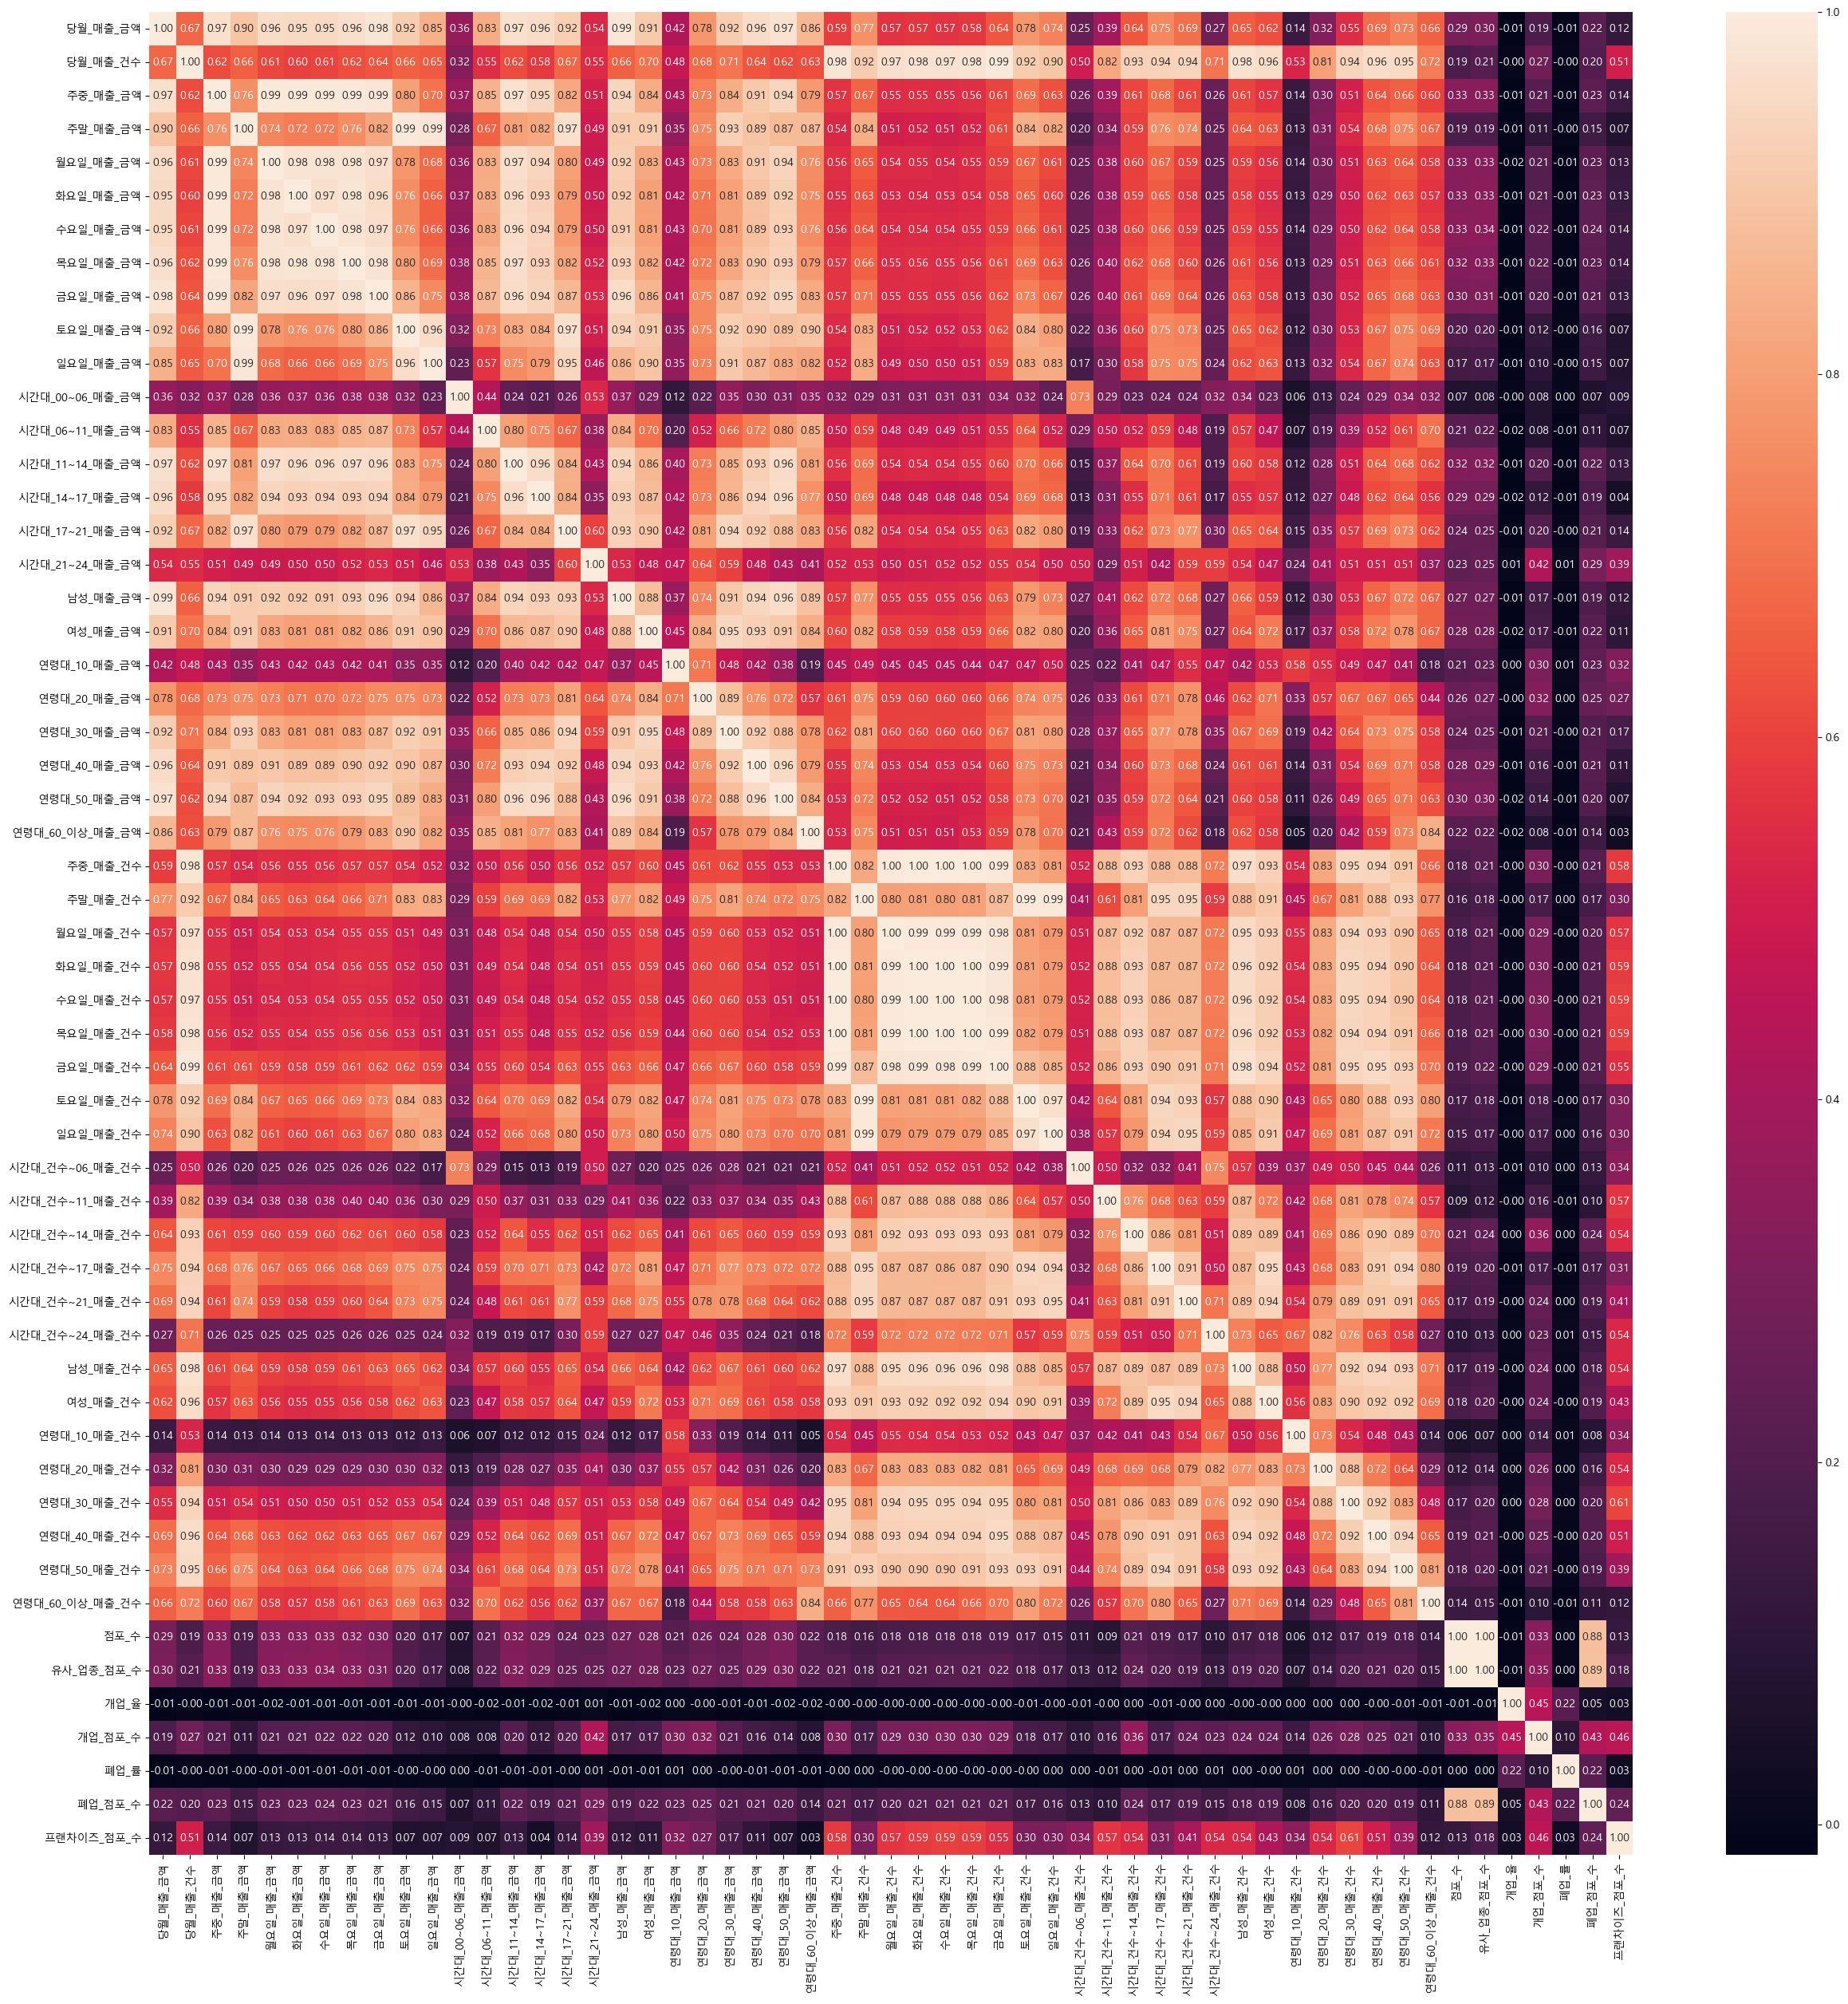

In [95]:
numeric_df = sale_store.select_dtypes(include='float64')

corr = numeric_df.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()